In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
def tabulate_tr(chrom):
    fn = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/%s.tr.pickle' % chrom
    tbl_tr = etl.frompickle(fn)
    return tbl_tr
    

In [3]:
# TODO replace with all chromosomes
tbl_tr = (
    etl
    .cat(*[tabulate_tr(chrom) for chrom in sorted(fasta.keys())[:2]])
    .sort(key=('chrom', 'start'))
)
tbl_tr

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|region_type
Pf3D7_01_v3,3,5,a,2,1,0,2,SubtelomericRepeat
Pf3D7_01_v3,5,8,c,3,1,0,3,SubtelomericRepeat
Pf3D7_01_v3,9,13,a,4,1,0,4,SubtelomericRepeat
Pf3D7_01_v3,13,15,c,2,1,0,2,SubtelomericRepeat
Pf3D7_01_v3,13,37,cctaaac,3,7,3,24,SubtelomericRepeat


## Compute fraction of core genome within a TR

In [4]:
def select_tr_threshold(row):
    unit_length = row.unit_length
    tract_length = row.tract_length
    return (
        ((unit_length == 1) and (tract_length >= 6)) or
        ((unit_length == 2) and (tract_length >= 9)) or
        ((unit_length == 3) and (tract_length >= 11)) or
        ((unit_length == 4) and (tract_length >= 13)) or
        ((unit_length == 5) and (tract_length >= 14)) or
        ((unit_length == 6) and (tract_length >= 16)) or
        ((unit_length >= 7) and (tract_length >= 18))
    )


tbl_tr_proper = tbl_tr.select(select_tr_threshold).cache()
tbl_tr_proper.display(20)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|region_type
Pf3D7_01_v3,13,37,cctaaac,3,7,3,24,SubtelomericRepeat
Pf3D7_01_v3,24,65,aaccctaaaccctg,2,14,13,41,SubtelomericRepeat
Pf3D7_01_v3,38,107,aaccctaaaccctgaacccta,3,21,6,69,SubtelomericRepeat
Pf3D7_01_v3,52,72,aacccta,2,7,6,20,SubtelomericRepeat
Pf3D7_01_v3,73,93,aacccta,2,7,6,20,SubtelomericRepeat
Pf3D7_01_v3,80,110,aaccctaaaccctg,2,14,2,30,SubtelomericRepeat
Pf3D7_01_v3,111,142,cctaaaccctgaac,2,14,3,31,SubtelomericRepeat
Pf3D7_01_v3,129,149,aaccctg,2,7,6,20,SubtelomericRepeat
Pf3D7_01_v3,149,167,aacccta,2,7,4,18,SubtelomericRepeat
Pf3D7_01_v3,169,197,aaaccctgaaccct,2,14,0,28,SubtelomericRepeat


In [5]:
tbl_tr_proper.valuecounts('chrom').displayall()

0|chrom,1|count,2|frequency
Pf3D7_02_v3,14970,0.5995914607281612
Pf3D7_01_v3,9997,0.40040853927183884


In [6]:
is_tr = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_tr[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_tr_proper.eq('chrom', chrom).records():
        start = rec.start - 1
        stop = rec.stop
        is_tr[chrom][start:stop] = True
is_tr

2016-03-13 23:45:52.115482 :: Pf3D7_01_v3
2016-03-13 23:45:52.267302 :: Pf3D7_02_v3
2016-03-13 23:45:52.469399 :: Pf3D7_03_v3
2016-03-13 23:45:52.482855 :: Pf3D7_04_v3
2016-03-13 23:45:52.496672 :: Pf3D7_05_v3
2016-03-13 23:45:52.520990 :: Pf3D7_06_v3
2016-03-13 23:45:52.538520 :: Pf3D7_07_v3
2016-03-13 23:45:52.562163 :: Pf3D7_08_v3
2016-03-13 23:45:52.581899 :: Pf3D7_09_v3
2016-03-13 23:45:52.600076 :: Pf3D7_10_v3
2016-03-13 23:45:52.624589 :: Pf3D7_11_v3
2016-03-13 23:45:52.638624 :: Pf3D7_12_v3
2016-03-13 23:45:52.662542 :: Pf3D7_13_v3
2016-03-13 23:45:52.677761 :: Pf3D7_14_v3


{'Pf3D7_01_v3': array([False, False, False, ...,  True,  True,  True], dtype=bool),
 'Pf3D7_02_v3': array([ True,  True,  True, ..., False, False, False], dtype=bool),
 'Pf3D7_03_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_04_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_05_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_06_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_07_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_08_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_09_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_10_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_11_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_12_v3': array([False, False, False, ..., False, False, False], dtype

In [7]:
tbl_regions_1b

0|region_chrom,1|region_start,2|region_stop,3|region_type,4|region_size
Pf3D7_01_v3,1,27336,SubtelomericRepeat,27336
Pf3D7_01_v3,27337,92900,SubtelomericHypervariable,65564
Pf3D7_01_v3,92901,457931,Core,365031
Pf3D7_01_v3,457932,460311,Centromere,2380
Pf3D7_01_v3,460312,575900,Core,115589


In [8]:
is_core = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_core[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_regions_1b.eq('region_chrom', chrom).eq('region_type', 'Core').records():
        start = rec.region_start - 1
        stop = rec.region_stop
        is_core[chrom][start:stop] = True


2016-03-13 23:45:58.241830 :: Pf3D7_01_v3
2016-03-13 23:45:58.243940 :: Pf3D7_02_v3
2016-03-13 23:45:58.246031 :: Pf3D7_03_v3
2016-03-13 23:45:58.248118 :: Pf3D7_04_v3
2016-03-13 23:45:58.250707 :: Pf3D7_05_v3
2016-03-13 23:45:58.253082 :: Pf3D7_06_v3
2016-03-13 23:45:58.255500 :: Pf3D7_07_v3
2016-03-13 23:45:58.257760 :: Pf3D7_08_v3
2016-03-13 23:45:58.260064 :: Pf3D7_09_v3
2016-03-13 23:45:58.262400 :: Pf3D7_10_v3
2016-03-13 23:45:58.264691 :: Pf3D7_11_v3
2016-03-13 23:45:58.267233 :: Pf3D7_12_v3
2016-03-13 23:45:58.271358 :: Pf3D7_13_v3
2016-03-13 23:45:58.275840 :: Pf3D7_14_v3


In [9]:
tbl_exons

0|feature_chrom,1|feature_type,2|feature_start,3|feature_stop,4|feature_length,5|feature_strand,6|feature_id,7|feature_parent_id,8|feature_name,9|feature_previous_id,10|feature_region_type,11|feature_region_size
Pf3D7_01_v3,CDS,29510,34762,5252,+,PF3D7_0100100.1:exon:1,PF3D7_0100100.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,35888,37126,1238,+,PF3D7_0100100.1:exon:2,PF3D7_0100100.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,38982,39923,941,-,PF3D7_0100200.1:exon:1,PF3D7_0100200.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,40154,40207,53,-,PF3D7_0100200.1:exon:2,PF3D7_0100200.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,42367,43617,1250,-,PF3D7_0100300.1:exon:1,PF3D7_0100300.1,None,None,SubtelomericHypervariable,65564


In [10]:
is_exon = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_exon[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_exons.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_exon[chrom][start:stop] = True


2016-03-13 23:45:59.393906 :: Pf3D7_01_v3
2016-03-13 23:45:59.500944 :: Pf3D7_02_v3
2016-03-13 23:45:59.651926 :: Pf3D7_03_v3
2016-03-13 23:45:59.799942 :: Pf3D7_04_v3
2016-03-13 23:45:59.904579 :: Pf3D7_05_v3
2016-03-13 23:46:00.020966 :: Pf3D7_06_v3
2016-03-13 23:46:00.130965 :: Pf3D7_07_v3
2016-03-13 23:46:00.226466 :: Pf3D7_08_v3
2016-03-13 23:46:00.324051 :: Pf3D7_09_v3
2016-03-13 23:46:00.440716 :: Pf3D7_10_v3
2016-03-13 23:46:00.557353 :: Pf3D7_11_v3
2016-03-13 23:46:00.662448 :: Pf3D7_12_v3
2016-03-13 23:46:00.829378 :: Pf3D7_13_v3
2016-03-13 23:46:00.950826 :: Pf3D7_14_v3


In [11]:
tbl_introns

0|feature_chrom,1|feature_type,2|feature_start,3|feature_stop,4|feature_length,5|feature_strand,6|feature_id,7|feature_parent_id,8|feature_name,9|feature_previous_id,10|feature_region_size,11|feature_region_type,12|region_size
Pf3D7_01_v3,intron,34762,35888,1126,+,PF3D7_0100100.1:exon:1_PF3D7_0100100.1:exon:2,PF3D7_0100100.1,None,None,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intron,39923,40154,231,-,PF3D7_0100200.1:exon:1_PF3D7_0100200.1:exon:2,PF3D7_0100200.1,None,None,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intron,43617,43775,158,-,PF3D7_0100300.1:exon:1_PF3D7_0100300.1:exon:2,PF3D7_0100300.1,None,None,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intron,50416,50572,156,+,PF3D7_0100400.1:exon:1_PF3D7_0100400.1:exon:2,PF3D7_0100400.1,None,None,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intron,54788,54938,150,-,PF3D7_0100600.1:exon:1_PF3D7_0100600.1:exon:2,PF3D7_0100600.1,None,None,65564,SubtelomericHypervariable,65564


In [12]:
is_intron = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_intron[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_introns.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_intron[chrom][start:stop] = True


2016-03-13 23:46:01.092166 :: Pf3D7_01_v3
2016-03-13 23:46:01.162980 :: Pf3D7_02_v3
2016-03-13 23:46:01.244138 :: Pf3D7_03_v3
2016-03-13 23:46:01.333618 :: Pf3D7_04_v3
2016-03-13 23:46:01.403279 :: Pf3D7_05_v3
2016-03-13 23:46:01.460166 :: Pf3D7_06_v3
2016-03-13 23:46:01.524022 :: Pf3D7_07_v3
2016-03-13 23:46:01.577249 :: Pf3D7_08_v3
2016-03-13 23:46:01.641898 :: Pf3D7_09_v3
2016-03-13 23:46:01.707917 :: Pf3D7_10_v3
2016-03-13 23:46:01.804117 :: Pf3D7_11_v3
2016-03-13 23:46:01.904248 :: Pf3D7_12_v3
2016-03-13 23:46:01.979306 :: Pf3D7_13_v3
2016-03-13 23:46:02.061075 :: Pf3D7_14_v3


In [13]:
tbl_intergenic

0|feature_chrom,1|feature_type,2|feature_start,3|feature_stop,4|feature_length,5|feature_id,6|feature_region_size,7|feature_region_type,8|region_size
Pf3D7_01_v3,intergenic_0,37126,38982,1856,PF3D7_0100100_PF3D7_0100200,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intergenic_1,40207,42367,2160,PF3D7_0100200_PF3D7_0100300,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intergenic_2,46507,50363,3856,PF3D7_0100300_PF3D7_0100400,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intergenic_0,51636,53169,1533,PF3D7_0100400_PF3D7_0100500,65564,SubtelomericHypervariable,65564
Pf3D7_01_v3,intergenic_1,53280,53778,498,PF3D7_0100500_PF3D7_0100600,65564,SubtelomericHypervariable,65564


In [14]:
is_intergenic = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_intergenic[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_intergenic.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_intergenic[chrom][start:stop] = True


2016-03-13 23:46:02.156761 :: Pf3D7_01_v3
2016-03-13 23:46:02.214456 :: Pf3D7_02_v3
2016-03-13 23:46:02.265586 :: Pf3D7_03_v3
2016-03-13 23:46:02.315324 :: Pf3D7_04_v3
2016-03-13 23:46:02.369027 :: Pf3D7_05_v3
2016-03-13 23:46:02.430841 :: Pf3D7_06_v3
2016-03-13 23:46:02.493390 :: Pf3D7_07_v3
2016-03-13 23:46:02.550637 :: Pf3D7_08_v3
2016-03-13 23:46:02.602735 :: Pf3D7_09_v3
2016-03-13 23:46:02.656116 :: Pf3D7_10_v3
2016-03-13 23:46:02.706805 :: Pf3D7_11_v3
2016-03-13 23:46:02.757295 :: Pf3D7_12_v3
2016-03-13 23:46:02.814112 :: Pf3D7_13_v3
2016-03-13 23:46:02.870569 :: Pf3D7_14_v3


In [15]:
def tr_composition():
    tbl = [['chrom', 'n_core', 'n_core_tr', 'n_core_coding', 'n_core_coding_tr', 'n_core_noncoding', 'n_core_noncoding_tr']]
    all_n_core = all_n_core_tr = all_n_core_coding = all_n_core_coding_tr = all_n_core_noncoding = all_n_core_noncoding_tr = 0
    for chrom in sorted(fasta.keys()):
        
        n_core = nnz(is_core[chrom])
        all_n_core += n_core
        is_core_tr = is_core[chrom] & is_tr[chrom]
        n_core_tr = nnz(is_core_tr)
        all_n_core_tr += n_core_tr
        
        is_core_coding = is_core[chrom] & is_exon[chrom]
        n_core_coding = nnz(is_core_coding)
        all_n_core_coding += n_core_coding
        is_core_coding_tr = is_core_coding & is_tr[chrom]
        n_core_coding_tr = nnz(is_core_coding_tr)
        all_n_core_coding_tr += n_core_coding_tr

        is_core_noncoding = is_core[chrom] & (is_intron[chrom] | is_intergenic[chrom])
        n_core_noncoding = nnz(is_core_noncoding)
        all_n_core_noncoding += n_core_noncoding
        is_core_noncoding_tr = is_core_noncoding & is_tr[chrom]
        n_core_noncoding_tr = nnz(is_core_noncoding_tr)
        all_n_core_noncoding_tr += n_core_noncoding_tr
        
        row = [chrom, n_core, n_core_tr, n_core_coding, n_core_coding_tr, n_core_noncoding, n_core_noncoding_tr]
        tbl += [row]
        
    # final row
    row = ['all', all_n_core, all_n_core_tr, all_n_core_coding, all_n_core_coding_tr, all_n_core_noncoding, all_n_core_noncoding_tr]
    tbl += [row]
    
    return (etl
        .wrap(tbl)
        .addfield('pc_core_tr', lambda row: '%.1f%%' % (row.n_core_tr * 100 / row.n_core))
        .addfield('pc_core_coding_tr', lambda row: '%.1f%%' % (row.n_core_coding_tr * 100 / row.n_core_coding))
        .addfield('pc_core_noncoding_tr', lambda row: '%.1f%%' % (row.n_core_noncoding_tr * 100 / row.n_core_noncoding))
    )
        
tr_composition().displayall()

0|chrom,1|n_core,2|n_core_tr,3|n_core_coding,4|n_core_coding_tr,5|n_core_noncoding,6|n_core_noncoding_tr,7|pc_core_tr,8|pc_core_coding_tr,9|pc_core_noncoding_tr
Pf3D7_01_v3,480620,109274,241195,28615,224105,77976,22.7%,11.9%,34.8%
Pf3D7_02_v3,753550,163990,407460,47753,326664,111767,21.8%,11.7%,34.2%
Pf3D7_03_v3,929971,0,530310,0,394018,0,0.0%,0.0%,0.0%
Pf3D7_04_v3,932894,0,511913,0,397236,0,0.0%,0.0%,0.0%
Pf3D7_05_v3,1281978,0,719041,0,560358,0,0.0%,0.0%,0.0%
Pf3D7_06_v3,1200478,0,693110,0,504785,0,0.0%,0.0%,0.0%
Pf3D7_07_v3,1204739,0,723557,0,477273,0,0.0%,0.0%,0.0%
Pf3D7_08_v3,1249936,0,691215,0,560202,0,0.0%,0.0%,0.0%
Pf3D7_09_v3,1392114,0,740164,0,645169,0,0.0%,0.0%,0.0%
Pf3D7_10_v3,1502845,0,815945,0,676628,0,0.0%,0.0%,0.0%


## Compute fraction polymorphic

In [16]:
tbl_tr_core = tbl_tr.eq('region_type', 'Core').cutout('region_type').cache()
tbl_tr_core

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length
Pf3D7_01_v3,92899,92907,taa,2,3,2,8
Pf3D7_01_v3,92900,92902,a,2,1,0,2
Pf3D7_01_v3,92903,92905,a,2,1,0,2
Pf3D7_01_v3,92912,92918,ata,2,3,0,6
Pf3D7_01_v3,92914,92916,a,2,1,0,2


In [17]:
def tabulate_indels(cross):
    
    # VCF file name
    vcf_fn = COMBINED_VCF_FN_TEMPLATE.format(cross=cross)
    
    # build the table
    tbl = (etl
        .fromvcf(vcf_fn, samples=None)
        # only keep PASS variants
        .false('FILTER')
        # exclude fields not needed in this analysis
        .cutout('ID', 'QUAL', 'FILTER')
        # unpack INFO
        .unpackdict('INFO', ['set', 'STR', 'RU', 'RPA'])
        # only keep INDELs
        .select(lambda row: len(row.REF) > 1 or any(len(a) > 1 for a in row.ALT))
        .addfield('cross', cross)        
    )
    
    return tbl    

In [18]:
tbl_indels = (
    etl
    .cat(*[tabulate_indels(cross) for cross in CROSSES])
    .sort(key=('CHROM', 'POS'))
)
tbl_indels

0|CHROM,1|POS,2|REF,3|ALT,4|set,5|STR,6|RU,7|RPA,8|cross
Pf3D7_01_v3,93901,AATATATATAT,[A],GATK,True,AT,"[19, 14]",3d7_hb3
Pf3D7_01_v3,93901,AATATATATATATAT,[A],GATK,True,AT,"[19, 12]",7g8_gb4
Pf3D7_01_v3,94588,C,[CATATAT],GATK,True,AT,"[13, 16]",7g8_gb4
Pf3D7_01_v3,94590,T,[TATAC],Intersection,None,None,None,3d7_hb3
Pf3D7_01_v3,94590,T,"[TATAT, TATAC]",Intersection,None,None,None,hb3_dd2


In [19]:
tbl_tr_indel = (
    tbl_tr_core
    .leftjoin(tbl_indels.addfield('pos_indel', lambda row: row.POS+1), 
              lkey=('chrom', 'start'),
              rkey=('CHROM', 'pos_indel'))
#     .cutout(13)
)
tbl_tr_indel.display(10)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|POS,9|REF,10|ALT,11|set,12|STR,13|RU,14|RPA,15|cross
Pf3D7_01_v3,92899,92907,taa,2,3,2,8,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92900,92902,a,2,1,0,2,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92903,92905,a,2,1,0,2,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92912,92918,ata,2,3,0,6,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92914,92916,a,2,1,0,2,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92915,92919,at,2,2,0,4,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92918,92920,t,2,1,0,2,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92920,92924,a,4,1,0,4,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92928,92932,t,4,1,0,4,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92932,92934,c,2,1,0,2,None,None,None,None,None,None,None,None


In [20]:
tbl_tr_indel.gt('tract_length', 10).display(50)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|POS,9|REF,10|ALT,11|set,12|STR,13|RU,14|RPA,15|cross
Pf3D7_01_v3,93247,93259,atttc,2,5,2,12,None,None,None,None,None,None,None,None
Pf3D7_01_v3,93902,93941,at,19,2,1,39,93901,AATATATATAT,[A],GATK,True,AT,"[19, 14]",3d7_hb3
Pf3D7_01_v3,93902,93941,at,19,2,1,39,93901,AATATATATATATAT,[A],GATK,True,AT,"[19, 12]",7g8_gb4
Pf3D7_01_v3,94126,94146,tatttta,2,7,6,20,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94258,94283,at,12,2,1,25,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94298,94312,ttataat,2,7,0,14,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94315,94329,tatttat,2,7,0,14,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94364,94376,atattt,2,6,0,12,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94433,94447,taa,4,3,2,14,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94497,94509,aatta,2,5,2,12,None,None,None,None,None,None,None,None


In [21]:
tbl_analysis = (
    tbl_tr_indel
    .aggregate(('chrom', 'start', 'stop', 'repeat_unit', 'n_units', 'unit_length', 'last_unit_length', 'tract_length'), 
               set, 'cross', presorted=True)
    .addfield('polymorphic', lambda row: row.value != set([None]))
    .addfield('polymorphic_3d7_hb3', lambda row: '3d7_hb3' in row.value)
    .addfield('polymorphic_hb3_dd2', lambda row: 'hb3_dd2' in row.value)
    .addfield('polymorphic_7g8_gb4', lambda row: '7g8_gb4' in row.value)
    .cutout('value')
)
tbl_analysis.gt('tract_length', 10).display(20)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|polymorphic,9|polymorphic_3d7_hb3,10|polymorphic_hb3_dd2,11|polymorphic_7g8_gb4
Pf3D7_01_v3,93247,93259,atttc,2,5,2,12,False,False,False,False
Pf3D7_01_v3,93902,93941,at,19,2,1,39,True,True,False,True
Pf3D7_01_v3,94126,94146,tatttta,2,7,6,20,False,False,False,False
Pf3D7_01_v3,94258,94283,at,12,2,1,25,False,False,False,False
Pf3D7_01_v3,94298,94312,ttataat,2,7,0,14,False,False,False,False
Pf3D7_01_v3,94315,94329,tatttat,2,7,0,14,False,False,False,False
Pf3D7_01_v3,94364,94376,atattt,2,6,0,12,False,False,False,False
Pf3D7_01_v3,94433,94447,taa,4,3,2,14,False,False,False,False
Pf3D7_01_v3,94497,94509,aatta,2,5,2,12,False,False,False,False
Pf3D7_01_v3,94589,94615,at,13,2,0,26,True,False,False,True


In [22]:
df = tbl_analysis.todataframe()
df.head()

,chrom,start,stop,repeat_unit,n_units,unit_length,last_unit_length,tract_length,polymorphic,polymorphic_3d7_hb3,polymorphic_hb3_dd2,polymorphic_7g8_gb4
0,Pf3D7_01_v3,92899,92907,taa,2,3,2,8,False,False,False,False
1,Pf3D7_01_v3,92900,92902,a,2,1,0,2,False,False,False,False
2,Pf3D7_01_v3,92903,92905,a,2,1,0,2,False,False,False,False
3,Pf3D7_01_v3,92912,92918,ata,2,3,0,6,False,False,False,False
4,Pf3D7_01_v3,92914,92916,a,2,1,0,2,False,False,False,False


In [23]:
df.tail()

,chrom,start,stop,repeat_unit,n_units,unit_length,last_unit_length,tract_length,polymorphic,polymorphic_3d7_hb3,polymorphic_hb3_dd2,polymorphic_7g8_gb4
328333,Pf3D7_02_v3,862480,862483,t,3,1,0,3,False,False,False,False
328334,Pf3D7_02_v3,862482,862487,ta,2,2,1,5,False,False,False,False
328335,Pf3D7_02_v3,862486,862491,t,5,1,0,5,False,False,False,False
328336,Pf3D7_02_v3,862496,862501,a,5,1,0,5,False,False,False,False
328337,Pf3D7_02_v3,862500,862505,at,2,2,1,5,False,False,False,False


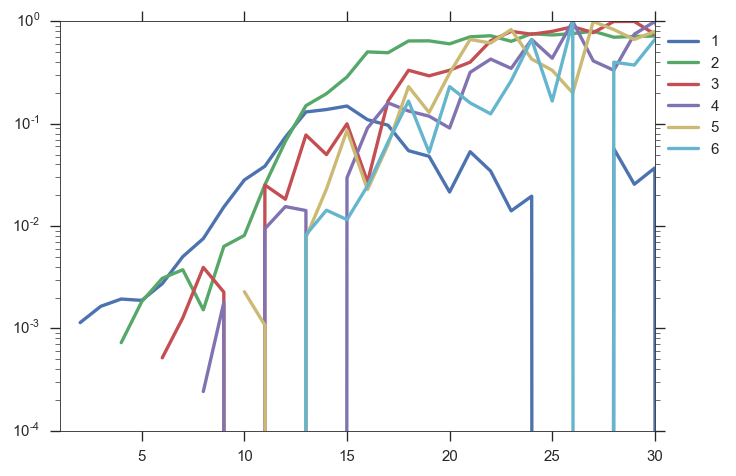

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

for unit_length in 1, 2, 3, 4, 5, 6:
    s1 = df[df.unit_length == unit_length].tract_length
    s2 = df[(df.unit_length == unit_length) & df.polymorphic].tract_length
    y1 = np.bincount(s1, minlength=70)[:70]
    y2 = np.bincount(s2, minlength=70)[:70]
    x = np.arange(0, 70, 1)
    y3 = y2 / y1
    ax.plot(x, y3, linestyle='-', marker=' ', lw=2, label=unit_length)

ax.set_xlim(1, 30)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_yscale('log');

In [25]:
tbl_tr_indel_2 = (
    tbl_tr_core
    .intervalleftjoin(tbl_indels.true('STR').addfield('pos_indel_stop', lambda row: row.POS+len(row.REF)), 
                      lkey='chrom', lstart='start', lstop='stop',
                      rkey='CHROM', rstart='POS', rstop='pos_indel_stop',
                      include_stop=True)
)
tbl_tr_indel_2.display(10)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|CHROM,9|POS,10|REF,11|ALT,12|set,13|STR,14|RU,15|RPA,16|cross,17|pos_indel_stop
Pf3D7_01_v3,92899,92907,taa,2,3,2,8,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92900,92902,a,2,1,0,2,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92903,92905,a,2,1,0,2,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92912,92918,ata,2,3,0,6,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92914,92916,a,2,1,0,2,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92915,92919,at,2,2,0,4,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92918,92920,t,2,1,0,2,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92920,92924,a,4,1,0,4,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92928,92932,t,4,1,0,4,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,92932,92934,c,2,1,0,2,None,None,None,None,None,None,None,None,None,None


In [26]:
tbl_tr_indel_2.gt('tract_length', 10).display(50)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|CHROM,9|POS,10|REF,11|ALT,12|set,13|STR,14|RU,15|RPA,16|cross,17|pos_indel_stop
Pf3D7_01_v3,93247,93259,atttc,2,5,2,12,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,93902,93941,at,19,2,1,39,Pf3D7_01_v3,93901,AATATATATAT,[A],GATK,True,AT,"[19, 14]",3d7_hb3,93912
Pf3D7_01_v3,93902,93941,at,19,2,1,39,Pf3D7_01_v3,93901,AATATATATATATAT,[A],GATK,True,AT,"[19, 12]",7g8_gb4,93916
Pf3D7_01_v3,94126,94146,tatttta,2,7,6,20,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94258,94283,at,12,2,1,25,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94298,94312,ttataat,2,7,0,14,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94315,94329,tatttat,2,7,0,14,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94364,94376,atattt,2,6,0,12,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94433,94447,taa,4,3,2,14,None,None,None,None,None,None,None,None,None,None
Pf3D7_01_v3,94497,94509,aatta,2,5,2,12,None,None,None,None,None,None,None,None,None,None


In [27]:
fasta['Pf3D7_01_v3'][94980:94993+30]

'atatataattcacatatatatatatatatatatatatatattt'

In [28]:
tbl_tr_core.eq('chrom', 'Pf3D7_01_v3').gt('start', 94990)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length
Pf3D7_01_v3,94991,94995,ca,2,2,0,4
Pf3D7_01_v3,94994,95022,at,14,2,0,28
Pf3D7_01_v3,95021,95024,t,3,1,0,3
Pf3D7_01_v3,95027,95032,ta,2,2,1,5
Pf3D7_01_v3,95031,95033,t,2,1,0,2


In [29]:
tbl_analysis_2 = (
    tbl_tr_indel_2
    .aggregate(('chrom', 'start', 'stop', 'repeat_unit', 'n_units', 'unit_length', 'last_unit_length', 'tract_length'), 
               set, 'cross', presorted=True)
    .addfield('polymorphic', lambda row: row.value != set([None]))
    .addfield('polymorphic_3d7_hb3', lambda row: '3d7_hb3' in row.value)
    .addfield('polymorphic_hb3_dd2', lambda row: 'hb3_dd2' in row.value)
    .addfield('polymorphic_7g8_gb4', lambda row: '7g8_gb4' in row.value)
    .cutout('value')
)
tbl_analysis_2.gt('tract_length', 10).display(20)

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|polymorphic,9|polymorphic_3d7_hb3,10|polymorphic_hb3_dd2,11|polymorphic_7g8_gb4
Pf3D7_01_v3,93247,93259,atttc,2,5,2,12,False,False,False,False
Pf3D7_01_v3,93902,93941,at,19,2,1,39,True,True,False,True
Pf3D7_01_v3,94126,94146,tatttta,2,7,6,20,False,False,False,False
Pf3D7_01_v3,94258,94283,at,12,2,1,25,False,False,False,False
Pf3D7_01_v3,94298,94312,ttataat,2,7,0,14,False,False,False,False
Pf3D7_01_v3,94315,94329,tatttat,2,7,0,14,False,False,False,False
Pf3D7_01_v3,94364,94376,atattt,2,6,0,12,False,False,False,False
Pf3D7_01_v3,94433,94447,taa,4,3,2,14,False,False,False,False
Pf3D7_01_v3,94497,94509,aatta,2,5,2,12,False,False,False,False
Pf3D7_01_v3,94589,94615,at,13,2,0,26,True,False,False,True


In [30]:
df2 = tbl_analysis_2.todataframe()
df2.head()

,chrom,start,stop,repeat_unit,n_units,unit_length,last_unit_length,tract_length,polymorphic,polymorphic_3d7_hb3,polymorphic_hb3_dd2,polymorphic_7g8_gb4
0,Pf3D7_01_v3,92899,92907,taa,2,3,2,8,False,False,False,False
1,Pf3D7_01_v3,92900,92902,a,2,1,0,2,False,False,False,False
2,Pf3D7_01_v3,92903,92905,a,2,1,0,2,False,False,False,False
3,Pf3D7_01_v3,92912,92918,ata,2,3,0,6,False,False,False,False
4,Pf3D7_01_v3,92914,92916,a,2,1,0,2,False,False,False,False


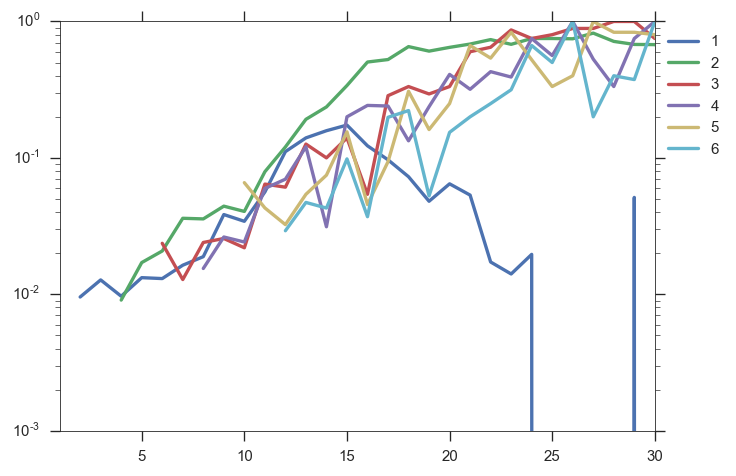

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

for unit_length in 1, 2, 3, 4, 5, 6:
    s1 = df2[df2.unit_length == unit_length].tract_length
    s2 = df2[(df2.unit_length == unit_length) & df2.polymorphic].tract_length
    y1 = np.bincount(s1, minlength=70)[:70]
    y2 = np.bincount(s2, minlength=70)[:70]
    x = np.arange(0, 70, 1)
    y3 = y2 / y1
    ax.plot(x, y3, linestyle='-', marker=' ', lw=2, label=unit_length)

ax.set_xlim(1, 30)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_yscale('log');